<a href="https://colab.research.google.com/github/purvadanait/AIML-Pract/blob/main/LogisticRegression%20as%20Neural%20Netwrk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [20]:
from keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
import tensorflow as tf

sequential model is stacks of layers. no hidden layers in this model.
nodes in input layer = 30 (equal to the number of features in the dataset)
no activation required for input layer.

In [27]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,
                  columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
X = df
y = pd.Series(cancer.target)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=2)

In [30]:
ANN_model = Sequential()

In [31]:
ANN_model.add(InputLayer(input_shape=(30, )))                                    #no hidden layers

ANN_model.add(Dense(1, activation='sigmoid'))

In [32]:
ANN_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [41]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
ANN_model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [42]:
history = ANN_model.fit(X_train, y_train, 
                        epochs=10, batch_size=32,
                        validation_split=0.2, 
                        shuffle=False)

Epoch 1/10
12/12 [==============================] - 1s 18ms/step - loss: 8.1909 - accuracy: 0.7005 - val_loss: 0.4201 - val_accuracy: 0.9121
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 2.8247 - accuracy: 0.7912 - val_loss: 1.2664 - val_accuracy: 0.8022
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 1.4718 - accuracy: 0.8489 - val_loss: 1.4907 - val_accuracy: 0.8022
Epoch 4/10
12/12 [==============================] - 0s 5ms/step - loss: 1.0819 - accuracy: 0.8874 - val_loss: 0.9883 - val_accuracy: 0.8462
Epoch 5/10
12/12 [==============================] - 0s 4ms/step - loss: 0.8375 - accuracy: 0.8984 - val_loss: 0.4985 - val_accuracy: 0.9011
Epoch 6/10
12/12 [==============================] - 0s 5ms/step - loss: 0.8445 - accuracy: 0.9121 - val_loss: 0.7097 - val_accuracy: 0.8791
Epoch 7/10
12/12 [==============================] - 0s 4ms/step - loss: 0.7320 - accuracy: 0.9203 - val_loss: 0.8490 - val_accuracy: 0.8681
Epoch 8/10
12/12 [=

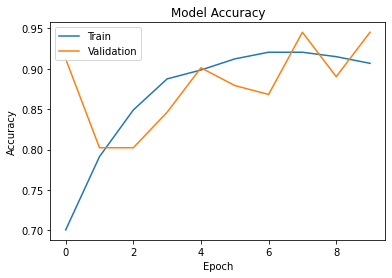

In [43]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

In [44]:
test_loss, test_acc = ANN_model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

4/4 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.9386
Test loss: 0.697629451751709
Test accuracy: 0.9385964870452881
